In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
data = pd.read_csv('myopia.csv')

In [3]:
data

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [4]:
data.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [5]:
# Features of the dataset
data.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [6]:
# List dataframe data types
data.dtypes 

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [7]:
data.nunique()

AGE            5
SPHEQ        511
AL           254
ACD          206
LT           128
VCD          226
SPORTHR       40
READHR        16
COMPHR        18
STUDYHR       14
TVHR          28
DIOPTERHR     75
MOMMY          2
DADMY          2
MYOPIC         2
dtype: int64

In [8]:
data_df = data.drop(["MYOPIC"], axis='columns')
data_df.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0


In [9]:
# Find null values
for column in data.columns:
    print(f"Column {column} has {data[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values


In [10]:
# Find duplicate entries
print(f"Duplicate entries: {data.duplicated().sum()}")


Duplicate entries: 0


In [11]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 
                                                'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']]) 

In [12]:
# A list of the columns from the original DataFrame
data.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'MYOPIC'],
      dtype='object')

In [13]:
new_data = pd.DataFrame(scaled_data, columns=data_df.columns[0:])
new_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


# PCA

In [14]:
# Applying PCA to reduce dimensions
# Initialize PCA model
# & preserve 90% of the explained variance in dimensionality reduction.
# Initialize PCA model
pca = PCA(n_components=0.90)

# Get two principal components for the myopic data.
new_data_pca = pca.fit_transform(scaled_data)

In [15]:
print(new_data_pca[0:3])


[[ 0.53550271  1.14500427 -1.38501894  0.11600593 -3.22669052 -1.92845879
  -1.95889156 -1.92299652  0.02675285  0.17814386]
 [-0.62470559 -1.57578643 -0.79425306  1.156287    0.2922565   0.34906013
  -0.45520626  0.28533229  0.68968261 -0.55703083]
 [-0.93347937 -0.71707622  0.82014993 -1.54763797  0.17394083  0.27278253
   0.02582071 -0.03081701 -0.43149908  0.01333582]]


In [16]:
new_data_pca_df = pd.DataFrame(
    data = new_data_pca, 
    columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]
)
new_data_pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


In [17]:
pca.explained_variance_ratio_


array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

### Explained Variance --> first 2 Features: 37%.

# TSNE

In [18]:
# Reduces Dimensions
from sklearn.manifold import TSNE


In [19]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(new_data_pca_df)


C:\Users\mezie\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [20]:
tsne_features.shape


(618, 2)

In [21]:
# Plot
new_data_pca_df['x'] = tsne_features[:,0]
new_data_pca_df['y'] = tsne_features[:,1]


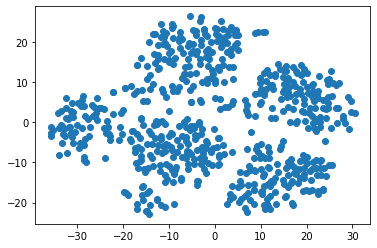

In [22]:
plt.scatter(new_data_pca_df['x'], new_data_pca_df['y'])
plt.show()


# KMeans

C:\Users\mezie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mezie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mezie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\mezie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

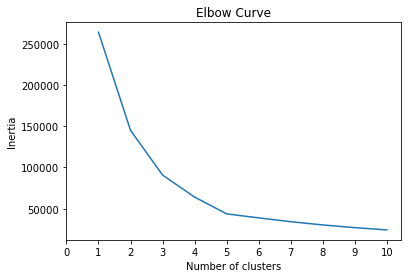

In [24]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_data_pca_df)
    inertia.append(km.inertia_)

# Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [25]:
# Predicting clusters with k=3  ---> Elbow

# k-means model
model = KMeans(n_clusters=3, random_state=0)

model.fit(new_data_pca_df)

predictions = model.predict(new_data_pca_df)

# Adding the predicted class column to the dataframe
new_data_pca_df["class"] = model.labels_
new_data_pca_df.head()


C:\Users\mezie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-8.246052,7.677163,0
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-10.262033,-5.799866,1
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,17.389978,5.193726,2
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,17.052071,-20.548649,2
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-13.093863,22.001377,0


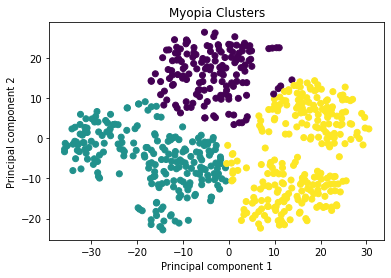

In [26]:
# Plot clusters
plt.scatter(x=new_data_pca_df['x'], y=new_data_pca_df['y'], c=new_data_pca_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia Clusters')
plt.show()


In [27]:
# Another example with k=5 

# k-means model
model = KMeans(n_clusters=5, random_state=0)

model.fit(new_data_pca_df)

predictions = model.predict(new_data_pca_df)

# Adding the predicted class column to the dataframe
new_data_pca_df["class"] = model.labels_
new_data_pca_df.head()


C:\Users\mezie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,x,y,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,-8.246052,7.677163,4
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,-10.262033,-5.799866,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,17.389978,5.193726,0
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,17.052071,-20.548649,3
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,-13.093863,22.001377,4


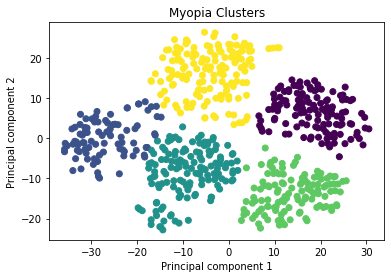

In [28]:
# Plot clusters
plt.scatter(x=new_data_pca_df['x'], y=new_data_pca_df['y'], c=new_data_pca_df['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia Clusters')
plt.show()
